###
- http://millionsongdataset.com/         (https://ismir2011.ismir.net/papers/OS6-1.pdf)
- http://millionsongdataset.com/lastfm/#getting

- https://arena.kakao.com/c/7


## 자료 다운로드
- https://www.kaggle.com/datasets/anuragbanerjee/million-song-data-set-subset?resource=download&select=song_data.csv
- https://www.kaggle.com/datasets/anuragbanerjee/million-song-data-set-subset?resource=download&select=10000.txt

In [5]:
import pandas as pd

meta_df = pd.read_csv('c:\\data\\song_data.csv')
meta_df.shape

(1000000, 5)

In [6]:
meta_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [9]:
count_df = pd.read_csv('c:\\data\\10000.txt', header=None, delimiter='\t', verbose=False, names=['user_id', 'song_id', 'song_count'])
count_df.head()

,user_id,song_id,song_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [10]:
count_df.shape

(2000000, 3)

In [11]:
df = pd.merge(count_df, meta_df.drop_duplicates(['song_id']), on='song_id', how='left')
print(df.shape)

(2000000, 7)


## Analyze data

In [12]:
from sklearn.preprocessing import LabelEncoder

song_ids = LabelEncoder()
song_ids.fit(df.song_id)
df.song_id = song_ids.transform(df.song_id)

user_ids = LabelEncoder()
user_ids.fit(df.user_id)
df.user_id = user_ids.transform(df.user_id)

In [13]:
df.head()

,user_id,song_id,song_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [14]:
df.describe()

,user_id,song_id,song_count,year
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.813599e+04,4.978114e+03,3.045485e+00,1.628645e+03
std,2.204443e+04,2.890991e+03,6.579720e+00,7.787283e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.911200e+04,2.430000e+03,1.000000e+00,1.984000e+03
50%,3.794900e+04,5.038000e+03,1.000000e+00,2.002000e+03
75%,5.713500e+04,7.512000e+03,3.000000e+00,2.007000e+03
max,7.635200e+04,9.999000e+03,2.213000e+03,2.010000e+03


C:\Users\BSS\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


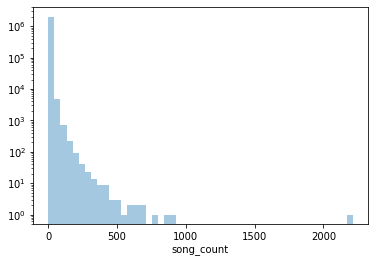

In [15]:
import seaborn as sns
plt = sns.distplot(df.song_count, kde=False)
plt.set_yscale('log')

In [16]:
print(df['user_id'].nunique())
print(df['song_id'].nunique())

76353
10000


In [17]:

stats_df = pd.concat([df.groupby(by='song_id')['song_count'].count(),
                      df.groupby(by='song_id')['song_count'].mean(),
                      df.groupby(by='song_id')['song_count'].std()], axis=1)

In [18]:
stats_df.columns = ['total_song_count', 'avg_song_count', 'std_song_count']
stats_df = stats_df.sort_values(by='total_song_count', ascending=False)
stats_df.head()

,total_song_count,avg_song_count,std_song_count
song_id,,,
2220,8277,3.749668,5.793191
317,7032,7.004124,13.244078
352,6949,3.836955,5.740380
614,6412,8.442920,18.923411
7416,6145,6.740114,16.531309


### Min-Max Scaler

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['song_count'] = scaler.fit_transform(df[['song_count']])
df.head()

,user_id,song_id,song_count,title,release,artist_name,year
0,54961,153,0.000000,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,0.000452,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,0.000000,Stronger,Graduation,Kanye West,2007
3,54961,750,0.000000,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,0.000000,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [20]:
stats_df.head()

,total_song_count,avg_song_count,std_song_count
song_id,,,
2220,8277,3.749668,5.793191
317,7032,7.004124,13.244078
352,6949,3.836955,5.740380
614,6412,8.442920,18.923411
7416,6145,6.740114,16.531309


In [21]:
stats_df.sort_values('avg_song_count', ascending=False)


,total_song_count,avg_song_count,std_song_count
song_id,,,
32,158,18.158228,38.039289
1990,148,16.891892,181.763962
7839,80,16.037500,102.725324
9859,125,15.976000,57.321598
3859,262,15.171756,20.536788
...,...,...,...
8088,74,1.108108,0.424186
7251,68,1.102941,0.306141
3971,65,1.092308,0.422902


## Load Last.fm dataset
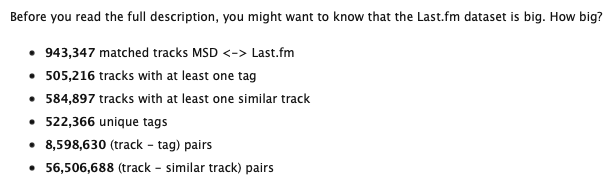

In [48]:
from glob import glob
import json
from tqdm import tqdm
import pandas as pd
import numpy as np

In [28]:
path='c:\\data\\'
category_list = [x for x in os.listdir(os.path.join(path, 'lastfm_subset')) if 'DS' not in x]
# [os.listdir(os.path.join(path, 'lastfm_subset/'+x)) for x in category_list]

category_list 

['A', 'B']

In [57]:
np.shape(category_list[0])

(26,)

In [87]:
path='c:\\data\\lastfm_subset\\*'
all_files=[]
for x1 in glob(path):
    for x2 in glob(x1 + '\\*\\'):
        for x3 in glob(x2+ '\\*'):
            tmp=glob(x3 + '\\*')
            all_files.extend(tmp)
              
len(all_files)

9330

In [90]:
with open(all_files[0], 'r', encoding='utf-8') as f:
  temp = json.load(f)

In [89]:
temp.keys()

dict_keys(['artist', 'timestamp', 'similars', 'tags', 'track_id', 'title'])

In [91]:
temp['tags']

[['Bay Area', '100'],
 ['hieroglyiphics', '100'],
 ['classic', '50'],
 ['Hip-Hop', '50'],
 ['stream', '50'],
 ['OG', '50'],
 ['1979-2006: A Hip-Hop Odyssey - 800 Tracks In A 48 Minute Mix', '50'],
 ['heiroglyphics', '50'],
 ['oaksterdamn', '50'],
 ['heard on Pandora', '0']]

In [92]:
data_list = []
similars_list = []
for filepath in tqdm(all_files[:1000]):
  with open(filepath, 'r', encoding='utf-8') as f:
    data = json.load(f)
    similars_data = {key: data[key] for key in data.keys() & {'similars'}}
    similars_list.append(similars_data)
    data.pop('similars', None)
    data_list.append(data)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2829.37it/s]


In [93]:
df = pd.DataFrame(data_list)

In [94]:
df.head()

,artist,timestamp,tags,track_id,title
0,Casual,2011-08-02 20:13:25.674526,"[[Bay Area, 100], [hieroglyiphics, 100], [clas...",TRAAAAW128F429D538,I Didn't Mean To
1,The Box Tops,2011-08-12 04:04:21.577908,"[[60s, 100], [soul, 52], [pop, 41], [rock, 35]...",TRAAABD128F429CF47,Soul Deep
2,La Sonora Santanera,2011-08-09 18:24:38.890272,"[[latin, 100]]",TRAAADZ128F9348C2E,Amor De Cabaret
3,Adam Ant,2011-08-11 21:57:49.876264,"[[new wave, 100], [80s, 66], [freedom, 33], [s...",TRAAAEF128F4273421,Something Girls
4,Gob,2011-08-09 01:59:41.352247,"[[punk rock, 100], [punk, 60]]",TRAAAFD128F92F423A,Face the Ashes


In [95]:
def get_tags(tag_list, threshold=0):
  if len(tag_list) > 0:
    return ' '.join([x[0] if int(x[1]) > threshold else '' for x in tag_list])
  else:
    return ''

In [96]:
df['tags_preprocessed'] = df['tags'].apply(lambda x: get_tags(x))

In [97]:

df.shape

(1000, 6)

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:

tfidf = TfidfVectorizer()

df['tags_preprocessed'] = df['tags_preprocessed'].fillna('')

tfidf_matrix = tfidf.fit_transform(df['tags_preprocessed'])
tfidf_matrix.shape

(1000, 4831)

In [103]:

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [104]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
pd.DataFrame(indices)

,0
title,
I Didn't Mean To,0
Soul Deep,1
Amor De Cabaret,2
Something Girls,3
Face the Ashes,4
...,...
Darby's Castle,995
Doing Time (Album Version),996
Sunny Came Home,997


In [108]:

def get_recomendation(title, cossim = cosine_sim ):
    idx = indices[title]
    scores = list(enumerate(cossim[idx])) # 코사인 유사도 점수 리스트

    # 점수를 기준으로 sort 하기
    scores = sorted(scores, key = lambda x:x[1], reverse=True)
    scores = scores[1:11] # Top 10 movies
    scores = [i[0] for i in scores] # get movie index list
     
    return df['title'].iloc[scores]

In [111]:
get_recomendation('Face the Ashes')

763                                 Don't Leave
552                    This Is Not a Crass Song
194                   God Save the Queen (Live)
64                            Stickin In My Eye
767                             Destroy Babylon
49                                  Human Being
906                         LA River (Acoustic)
945    There Are Things I Think You Should Know
162                                    Orgofart
226                              Amber Changing
Name: title, dtype: object